In [19]:
import pandas as pd 
import os 
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Obtendo o diretório atual do script
#diretorio_atual = os.path.dirname(os.path.abspath('__file__'))

# Construindo o caminho para o arquivo CSV usando o caminho relativo
#caminho = os.path.join(diretorio_atual,'..','..','..','..','Data', 'Bases Modificadas', 'correlacoes_entopia_removido.csv')

# Carregando o arquivo CSV
df = pd.read_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\Utilizando-Modelos-de-Machine-Learning-para-Caracterização-da-Depressão-no-Brasil\Data\Bases Modificadas\correlacoes_entopia_removido.csv')

In [21]:
colunas_numericas = ['peso_consolidado(KG)', 'altura_consolidada(CM)', 'renda_total']

In [22]:
# Função para detectar outliers usando o método IQR
def detectar_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return data[(data < limite_inferior) | (data > limite_superior)]


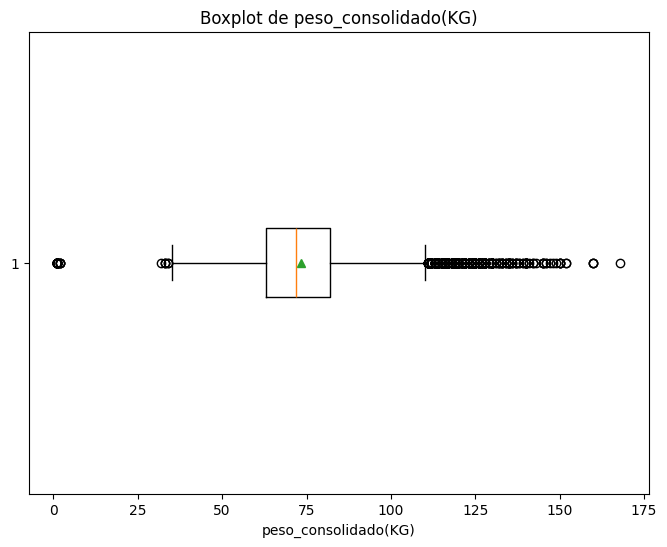

Outliers em peso_consolidado(KG):
55       125.0
59       129.0
111      115.0
184      125.0
463        1.0
         ...  
35568    113.0
35590    119.0
35759    160.0
35964    119.0
35992    113.0
Name: peso_consolidado(KG), Length: 662, dtype: float64


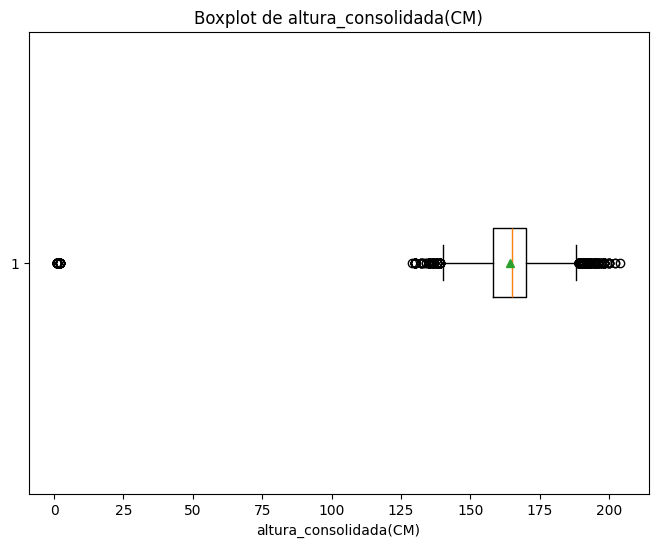

Outliers em altura_consolidada(CM):
59       190.0
184      190.0
200      192.0
463        2.0
835      192.0
         ...  
35596    197.0
35603    200.0
35726    135.0
35964    193.0
35970    190.0
Name: altura_consolidada(CM), Length: 418, dtype: float64


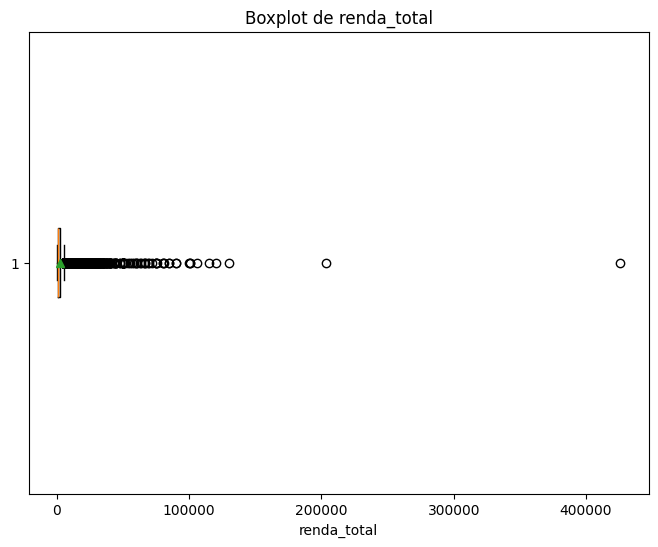

Outliers em renda_total:
5         7985.0
6        12001.0
7         8001.0
16       18750.0
39        9701.0
          ...   
36055    32000.0
36087     5501.0
36131    10001.0
36137     7201.0
36138    10001.0
Name: renda_total, Length: 3153, dtype: float64


In [23]:
# Iterar sobre as colunas numéricas
for coluna in colunas_numericas:
    outliers = detectar_outliers_iqr(df[coluna])

    # Plotar boxplot para visualizar outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[coluna], vert=False, showmeans=True, showfliers=True)
    plt.title(f'Boxplot de {coluna}')
    plt.xlabel(coluna)
    plt.show()

    # Imprimir os outliers
    print(f'Outliers em {coluna}:')
    print(outliers)


In [24]:
# Contar a quantidade de valores únicos em cada atributo (ordenado do maior para o menor)
for coluna in df[colunas_numericas].columns:
    print(f"Coluna: {coluna}")
    print(df[coluna].value_counts().sort_values(ascending=False))  # Ordena do maior para o menor
    print("\n")



Coluna: peso_consolidado(KG)
peso_consolidado(KG)
65.0     1364
70.0     1354
72.0     1319
68.0     1222
80.0     1206
         ... 
147.0       1
143.0       1
149.0       1
141.0       1
32.0        1
Name: count, Length: 123, dtype: int64


Coluna: altura_consolidada(CM)
altura_consolidada(CM)
160.0    2881
165.0    2760
170.0    2153
168.0    1600
162.0    1537
         ... 
133.0       2
202.0       2
199.0       1
129.0       1
204.0       1
Name: count, Length: 75, dtype: int64


Coluna: renda_total
renda_total
0.0       4486
998.0     2889
999.0     1635
2001.0    1298
1501.0    1228
          ... 
4094.0       1
2270.0       1
3493.0       1
2871.0       1
3016.0       1
Name: count, Length: 2526, dtype: int64




In [26]:
# Removendo outliers 
limites = {
    'peso_consolidado(KG)': (50, 150),  # Limites para peso
    'altura_consolidada(CM)': (125, 210),  # Limites para altura
    'renda_total': (0, 100000),  # Limites para renda
}

# Remover outliers em cada coluna
for coluna in colunas_numericas:
    limite_inferior, limite_superior = limites[coluna]
    df = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

In [27]:
df.to_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\Utilizando-Modelos-de-Machine-Learning-para-Caracterização-da-Depressão-no-Brasil\Data\Bases Modificadas\df_sem_outliers.csv', index=False)